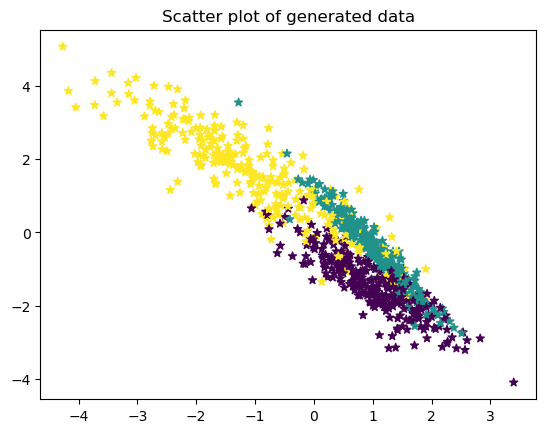

Actual Value: 0
Predicted Value: 0
Accuracy: 0.8484848484848485
F1 Score: 0.8478577273806642


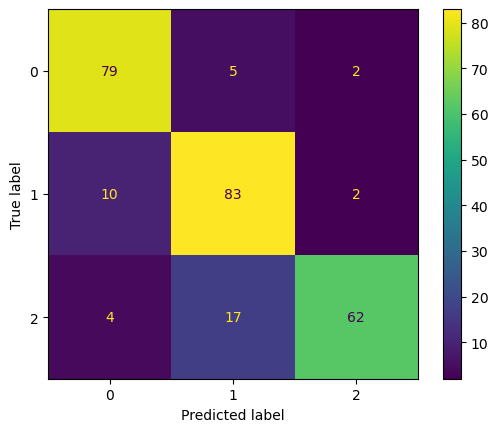

In [8]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, f1_score

# Generating the dataset
X, y = make_classification(
    n_features=6, n_classes=3, n_samples=800, 
    n_informative=2, random_state=1, n_clusters_per_class=1
)

# Scatter plot of first two features
plt.scatter(X[:, 0], X[:, 1], c=y, marker="*")
plt.title("Scatter plot of generated data")
plt.show()

# Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=125
)

# Model building and training
model = GaussianNB()
model.fit(X_train, y_train)

# Predicting a single instance
predicted = model.predict([X_test[6]])

print("Actual Value:", y_test[6])
print("Predicted Value:", predicted[0])

# Model Evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average="weighted")

print("Accuracy:", accuracy)
print("F1 Score:", f1)

# Visualizing the Confusion Matrix
labels = np.unique(y)
cm = confusion_matrix(y_test, y_pred, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()
plt.show()


Dataset Preview:
  Gender Married Dependents     Education Self_Employed  ApplicantIncome  \
0   Male      No          0      Graduate            No             5849   
1   Male     Yes          1      Graduate            No             4583   
2   Male     Yes          0      Graduate           Yes             3000   
3   Male     Yes          0  Not Graduate            No             2583   
4   Male      No          0      Graduate            No             6000   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0                0.0         NaN             360.0             1.0   
1             1508.0       128.0             360.0             1.0   
2                0.0        66.0             360.0             1.0   
3             2358.0       120.0             360.0             1.0   
4                0.0       141.0             360.0             1.0   

  Property_Area Loan_Status  
0         Urban           Y  
1         Rural           N  
2         Urban

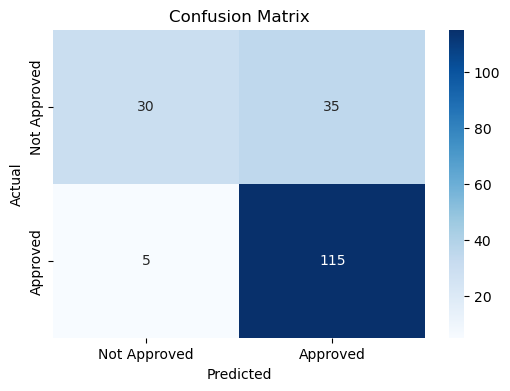

In [5]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.impute import SimpleImputer

# Load the Loan Dataset
file_path = "loan.csv"  # Ensure correct path
data = pd.read_csv(r"C:\Users\yashw\Downloads\loan.csv")

# Drop the Loan_ID column (it's not useful for predictions)
if 'Loan_ID' in data.columns:
    data.drop(columns=['Loan_ID'], inplace=True)

# Display dataset information
print("Dataset Preview:")
print(data.head())

# Check for missing values
print("\nMissing Values Before Handling:")
print(data.isnull().sum())

# Handling missing values
imputer = SimpleImputer(strategy="most_frequent")  # Impute with most frequent value
data.iloc[:, :] = imputer.fit_transform(data)

# Encoding categorical variables
categorical_columns = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Dependents']
existing_categorical = [col for col in categorical_columns if col in data.columns]

data = pd.get_dummies(data, columns=existing_categorical, drop_first=True)

# Encode target variable
if 'Loan_Status' in data.columns:
    data['Loan_Status'] = data['Loan_Status'].map({'Y': 1, 'N': 0})  # Encode as binary
else:
    raise KeyError("Column 'Loan_Status' not found in dataset!")

# Display updated columns
print("\nColumns in the dataset after encoding:")
print(data.columns)

# Define features and target variable
X = data.drop('Loan_Status', axis=1)  # Features
y = data['Loan_Status']  # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the Naive Bayes Classifier
model = GaussianNB()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("\nModel Evaluation:")
print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Visualize the confusion matrix
plt.figure(figsize=(6, 4))
labels = ['Not Approved', 'Approved']
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
